### BASEBALL ANALYSIS

***Overview:
This dataset contains comprehensive statistics related to baseball teams over various seasons. The data spans multiple years and includes information about team performance, game statistics, and other related metrics.***

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from scipy.stats import kurtosis
from scipy.stats import skew
import statistics
import warnings

In [2]:
df =pd.read_csv('/kaggle/input/baseballl/baseball_teams.csv')

In [3]:
df

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,367,2,42,23,225,NaN,0.830,Boston Red Stockings,South End Grounds I,NaN
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,308,6,28,22,218,NaN,0.820,Chicago White Stockings,Union Base-Ball Grounds,NaN
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,346,13,53,34,223,NaN,0.810,Cleveland Forest Citys,National Association Grounds,NaN
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,261,5,21,17,163,NaN,0.800,Fort Wayne Kekiongas,Hamilton Field,NaN
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,373,7,42,22,227,NaN,0.830,New York Mutuals,Union Grounds (Brooklyn),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,2015,NL,LAN,LAD,W,1,162,81.0,92,70,...,1317,145,395,1396,75,133.0,0.988,Los Angeles Dodgers,Dodger Stadium,3764815.0
2801,2015,NL,SFN,SFG,W,2,162,81.0,84,78,...,1344,155,431,1165,78,145.0,0.987,San Francisco Giants,AT&T Park,3375882.0
2802,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,1450,182,500,1215,86,146.0,0.986,Arizona Diamondbacks,Chase Field,2080145.0
2803,2015,NL,SDN,SDP,W,4,162,81.0,74,88,...,1371,171,516,1393,92,138.0,0.985,San Diego Padres,Petco Park,2459742.0


In [4]:
#checking null values
df.isnull().sum()

Year                      0
League                   50
Team                      0
Franchise                 0
Division               1517
Final_Standing            0
Games_Played              0
Unnamed: 7              399
Games_Won                 0
Games_Lost                0
Unnamed: 10            1545
Unnamed: 11            2181
League_Win               28
World_Series            357
Runs_Scored               0
At_Bats                   0
Hits                      0
Doubles                   0
Triples                   0
Home_Runs                 0
Walks                     0
Strike_Outs             120
Stolen_Bases            144
Caught_Stealing         859
Hit_By_Pitch           2325
Sacrifice_Fly          2325
Runs_Against              0
Earned_Runs               0
Earned_Run_Average        0
Complete_Games            0
Shutout                   0
Saves                     0
Infield_Put_Outs          0
Hits_Allowed              0
Home_Run_Allowed          0
Walks_Allowed       

In [5]:
#dropping the columns which are in larger missing value
df.dropna(subset=['Hit_By_Pitch','Sacrifice_Fly','Division'],inplace=True)

In [6]:
#replacing by median and mode values
categorical_columns=['League','Home_Ball_Park']
numerical_columns=['League_Win','Strike_Outs','Stolen_Bases','Caught_Stealing','Double_Plays']


#using loop for categorical and numerical
for column in categorical_columns:
    mode_value=df[column].mode()
df[column].fillna(mode_value, inplace=True)
    

for column in numerical_columns:
    median_value=df[column].median()
df[column].fillna(median_value,inplace=True)

print(df)


      Year  League Team  Franchise  Division  Final_Standing  Games_Played  \
2325   2000     AL   ANA        ANA        W               3           162   
2326   2000     NL   ARI        ARI        W               3           162   
2327   2000     NL   ATL        ATL        E               1           162   
2328   2000     AL   BAL        BAL        E               4           162   
2329   2000     AL   BOS        BOS        E               2           162   
...     ...    ...   ...        ...      ...             ...           ...   
2800   2015     NL   LAN        LAD        W               1           162   
2801   2015     NL   SFN        SFG        W               2           162   
2802   2015     NL   ARI        ARI        W               3           162   
2803   2015     NL   SDN        SDP        W               4           162   
2804   2015     NL   COL        COL        W               5           162   

      Unnamed: 7  Games_Won  Games_Lost  ... Hits_Allowed Home_

/tmp/ipykernel_17/248047769.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)
/tmp/ipykernel_17/248047769.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [7]:
#checking for null values, its clean 
df.isnull().sum()

Year                   0
League                 0
Team                   0
Franchise              0
Division               0
Final_Standing         0
Games_Played           0
Unnamed: 7             0
Games_Won              0
Games_Lost             0
Unnamed: 10            0
Unnamed: 11            0
League_Win             0
World_Series           0
Runs_Scored            0
At_Bats                0
Hits                   0
Doubles                0
Triples                0
Home_Runs              0
Walks                  0
Strike_Outs            0
Stolen_Bases           0
Caught_Stealing        0
Hit_By_Pitch           0
Sacrifice_Fly          0
Runs_Against           0
Earned_Runs            0
Earned_Run_Average     0
Complete_Games         0
Shutout                0
Saves                  0
Infield_Put_Outs       0
Hits_Allowed           0
Home_Run_Allowed       0
Walks_Allowed          0
Strikeouts_Allowed     0
Errors                 0
Double_Plays           0
Fielding_Percentage    0


In [8]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

In [9]:
#fetching the baseball data between 1960 to 2010
baseball_data =df[(df.Year >= 1960) & (df.Year <= 2010)]

In [10]:
baseball_data

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
2325,2000,AL,ANA,ANA,W,3,162,81.0,82,80,...,1534,228,662,846,134,182.0,0.978,Anaheim Angels,Edison International Field,2066982.0
2326,2000,NL,ARI,ARI,W,3,162,81.0,85,77,...,1441,190,500,1220,107,138.0,0.982,Arizona Diamondbacks,Bank One Ballpark,2942251.0
2327,2000,NL,ATL,ATL,E,1,162,81.0,95,67,...,1428,165,484,1093,129,138.0,0.979,Atlanta Braves,Turner Field,3234304.0
2328,2000,AL,BAL,BAL,E,4,162,81.0,74,88,...,1547,202,665,1017,116,151.0,0.981,Baltimore Orioles,Oriole Park at Camden Yards,3297031.0
2329,2000,AL,BOS,BOS,E,2,162,81.0,85,77,...,1433,173,498,1121,109,120.0,0.982,Boston Red Sox,Fenway Park II,2585895.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,2010,NL,SLN,STL,C,2,162,81.0,86,76,...,1412,133,477,1094,99,172.0,0.984,St. Louis Cardinals,Busch Stadium III,3301218.0
2651,2010,AL,TBA,TBD,E,1,162,81.0,96,66,...,1347,175,478,1189,85,134.0,0.986,Tampa Bay Rays,Tropicana Field,1843445.0
2652,2010,AL,TEX,TEX,W,1,162,81.0,90,72,...,1355,162,551,1181,105,133.0,0.982,Texas Rangers,Rangers Ballpark in Arlington,2505171.0
2653,2010,AL,TOR,TOR,E,4,162,78.0,85,77,...,1407,150,539,1184,92,172.0,0.985,Toronto Blue Jays,Rogers Centre,1625555.0


In [11]:
variables=df[['Games_Won','Runs_Scored','Runs_Against','Hits_Allowed','Strikeouts_Allowed','Errors','Fielding_Percentage','Earned_Run_Average']]
variables.describe()

,Games_Won,Runs_Scored,Runs_Against,Hits_Allowed,Strikeouts_Allowed,Errors,Fielding_Percentage,Earned_Run_Average
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,80.968750,739.537500,739.537500,1448.314583,1115.756250,101.845833,0.983250,4.236125
std,11.417722,84.824137,89.044936,88.471024,126.013258,16.287641,0.002656,0.535741
min,43.000000,513.000000,525.000000,1233.000000,764.000000,54.000000,0.976000,2.940000
25%,72.000000,681.750000,675.750000,1383.750000,1020.000000,90.000000,0.982000,3.857500
50%,82.000000,735.000000,733.500000,1447.500000,1110.000000,101.000000,0.983000,4.200000
75%,90.000000,795.250000,801.000000,1506.500000,1208.250000,112.000000,0.985000,4.592500
max,116.000000,978.000000,974.000000,1683.000000,1450.000000,145.000000,0.991000,5.710000


In [12]:
variables.corr()

,Games_Won,Runs_Scored,Runs_Against,Hits_Allowed,Strikeouts_Allowed,Errors,Fielding_Percentage,Earned_Run_Average
Games_Won,1.000000,0.513980,-0.617846,-0.511870,0.333489,-0.363009,0.371307,-0.615553
Runs_Scored,0.513980,1.000000,0.265793,0.249213,-0.237522,-0.015498,0.017753,0.264099
Runs_Against,-0.617846,0.265793,1.000000,0.876678,-0.614228,0.430937,-0.443104,0.988906
Hits_Allowed,-0.511870,0.249213,0.876678,1.000000,-0.659028,0.337316,-0.332188,0.869743
Strikeouts_Allowed,0.333489,-0.237522,-0.614228,-0.659028,1.000000,-0.296472,0.273888,-0.619729
Errors,-0.363009,-0.015498,0.430937,0.337316,-0.296472,1.000000,-0.987505,0.349861
Fielding_Percentage,0.371307,0.017753,-0.443104,-0.332188,0.273888,-0.987505,1.000000,-0.366769
Earned_Run_Average,-0.615553,0.264099,0.988906,0.869743,-0.619729,0.349861,-0.366769,1.000000


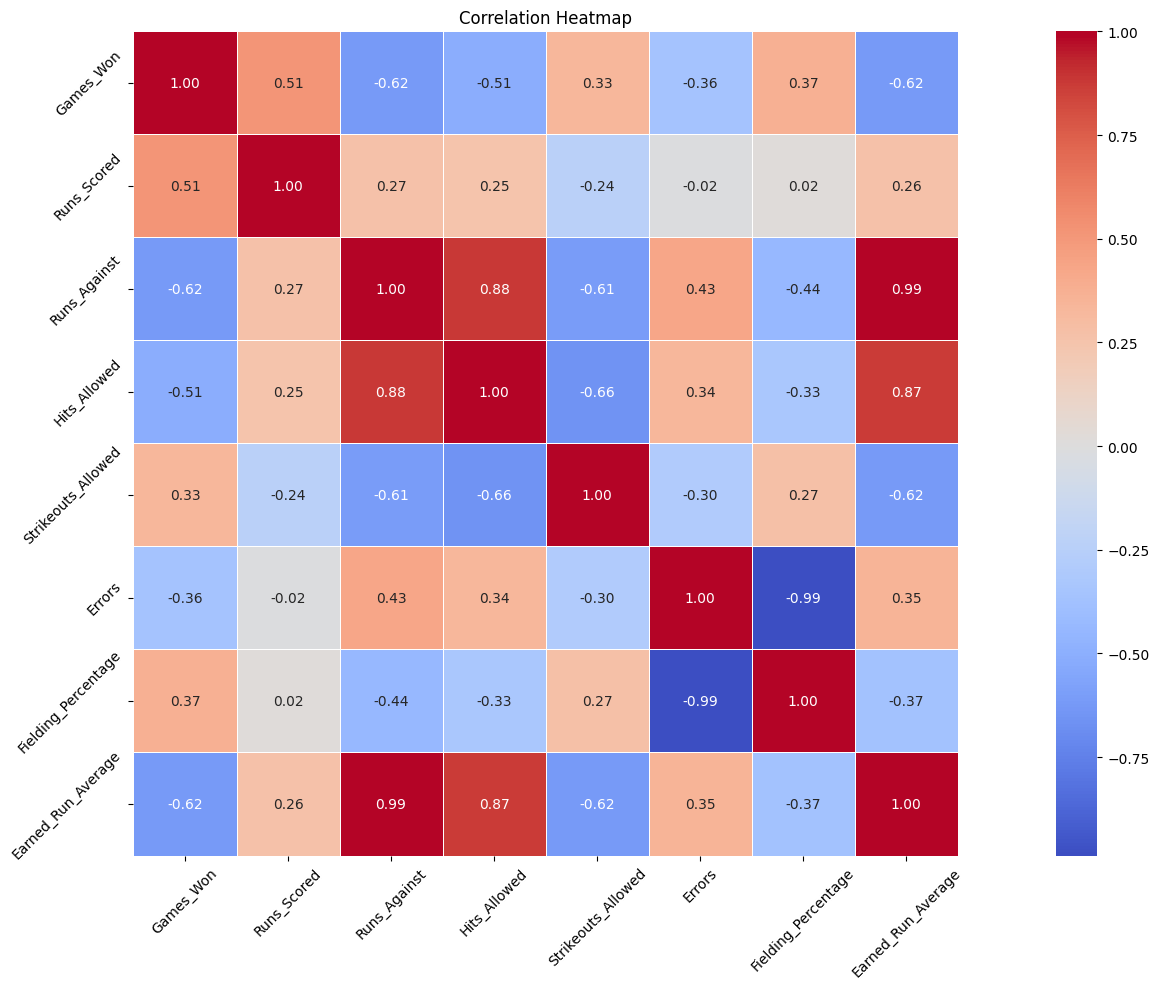

In [13]:
corr_matrix=variables.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True,xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns,center=0)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
variables=df[['Games_Won','Runs_Scored','Runs_Against','Hits_Allowed','Strikeouts_Allowed','Errors','Fielding_Percentage','Earned_Run_Average']]

Mean:80.96875
Median:82.0


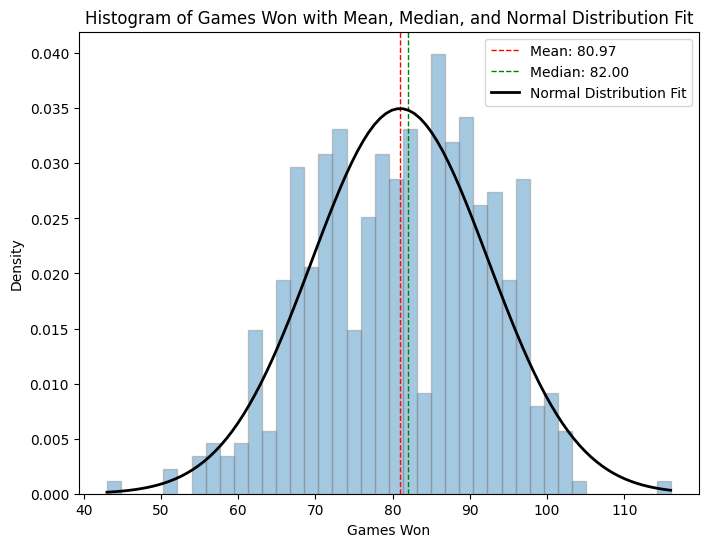

In [15]:
# Calculate mean and median
from scipy.stats import trim_mean
mean_value = df['Games_Won'].mean()
median_value = df['Games_Won'].median()

print(f'Mean:{mean_value}')
print(f'Median:{median_value}')

# Set figure size
plt.rcParams["figure.figsize"] = (8, 6)

# Create histogram and get bin edges using function
hist, bin_edges = np.histogram(df['Games_Won'], bins=40, density=True)

# Plot histogram
plt.hist(df['Games_Won'], bins=40, density=True, edgecolor='grey', alpha=0.4)

# Add mean and median lines
plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')

# Fit a normal distribution to the data
mn, std = sts.norm.fit(df['Games_Won'])  # Mean and standard deviation of the normal distribution

# Generate x values for the normal distribution curve
x_bin= np.linspace(bin_edges[0], bin_edges[-1], 100)

# Calculate normal distribution curve
y_curve = sts.norm.pdf(x_bin, mn, std)

# Plot normal distribution curve
plt.plot(x_bin, y_curve, 'k', linewidth=2, label='Normal Distribution Fit')

# Add labels, title, and legend
plt.xlabel('Games Won')
plt.ylabel('Density')
plt.title('Histogram of Games Won with Mean, Median, and Normal Distribution Fit')
plt.legend()

# Show plot
plt.show()

<Axes: title={'center': 'Boxplot of Games_won'}>

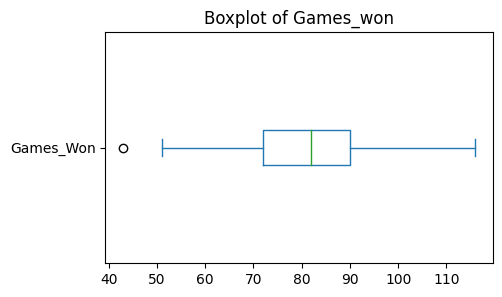

In [16]:
#boxplot for the variable "Games_Won"
plt.rcParams["figure.figsize"]=(5,3)
df['Games_Won'].plot(kind='box',vert=False,title='Boxplot of Games_won')

Teams tend to have consistent performance levels across these metrics, with average values showing typical team achievements and challenges. Adjusting for unusual data helps in understanding the normal performance without the impact of extreme values.

In [17]:
var=df[['Games_Won','Runs_Scored']]
var.corr()

,Games_Won,Runs_Scored
Games_Won,1.00000,0.51398
Runs_Scored,0.51398,1.00000


<Axes: >

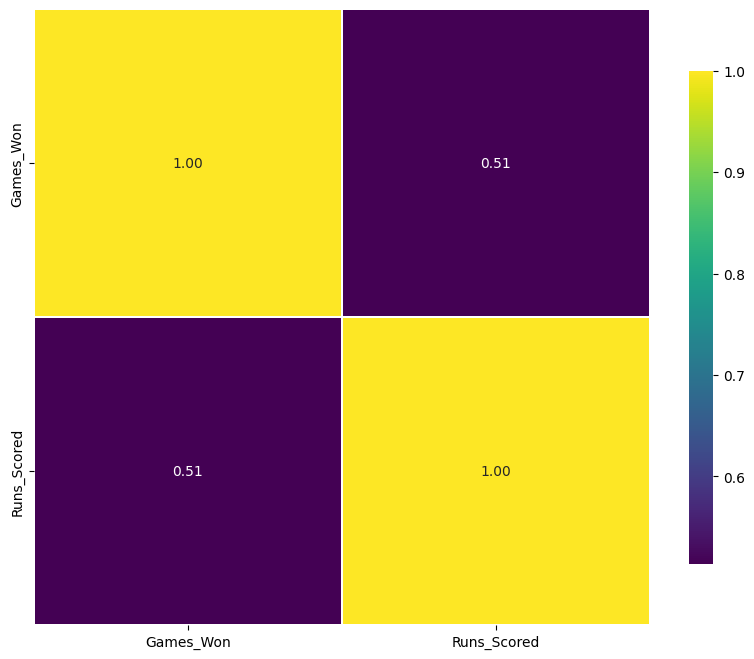

In [18]:
corr_matrix1= var.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix1,annot=True,cmap='viridis',fmt='.2f',linewidth=.2,square=True,annot_kws={"size": 10},cbar_kws={"shrink": .8})

In [19]:
varr=df[['Games_Won','Runs_Against']]
varr.corr()

,Games_Won,Runs_Against
Games_Won,1.000000,-0.617846
Runs_Against,-0.617846,1.000000


<Axes: >

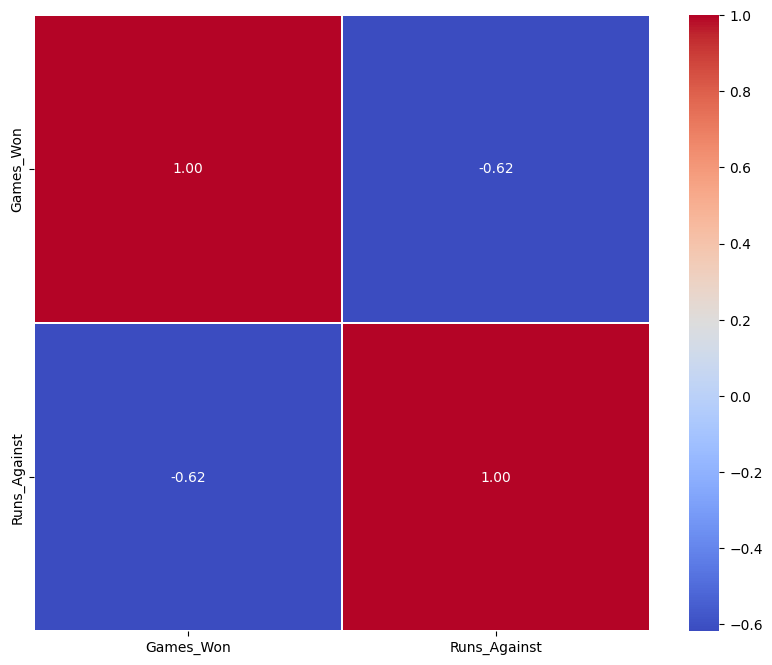

In [20]:
corr_matrix=varr.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm',linewidth='.2',square=True)

In [21]:
varr=df[['Games_Won','Runs_Against','Runs_Scored']]
df['var_minus'] = df['Runs_Scored'] - df['Runs_Against']
varrr=['Games_Won','var_minus']
correlation = df['var_minus'].corr(df['Games_Won'])
print(f"Correlation between 'var_minus' and 'Games_Won': {correlation:.2f}")

Correlation between 'var_minus' and 'Games_Won': 0.94


In [22]:
varr=df[['Runs_Scored','Games_Lost']]
corr_matrix = varr.corr()
correlation = corr_matrix.loc['Runs_Scored', 'Games_Lost']
print(f"Correlation between Runs_Scored and Games_Lost: {correlation:.2f}")

Correlation between Runs_Scored and Games_Lost: -0.51


In [23]:
varr=df[['Runs_Against','Games_Lost']]
corr_matrix = varr.corr()
correlation = corr_matrix.loc['Runs_Against', 'Games_Lost']
print(f"Correlation between Runs_Scored and Games_Lost: {correlation:.2f}")

Correlation between Runs_Scored and Games_Lost: 0.62


In [24]:
varr=df[['Games_Lost','Runs_Against','Runs_Scored']]
df['var_minus'] = df['Runs_Scored'] - df['Runs_Against']
varrr=['Games_Lost','var_minus']
correlation = df['var_minus'].corr(df['Games_Lost'])
print(f"Correlation between 'var_minus' and 'Games_Lost': {correlation:.2f}")

Correlation between 'var_minus' and 'Games_Lost': -0.93


Margin of Victory & Games Won: A strong positive correlation (0.94) shows that a larger margin of victory (runs scored minus runs allowed) strongly predicts more wins.

Runs Scored & Games Lost: A moderate negative correlation (-0.51) indicates that scoring more runs tends to reduce the number of games lost.

Runs Allowed & Games Lost: A moderate positive correlation (0.62) suggests that allowing more runs is linked to more losses.

Margin of Victory & Games Lost: A strong negative correlation (-0.93) confirms that a higher margin of victory is closely associated with fewer losses.

In [25]:
import statsmodels.api as sm
X1 = df[['Runs_Scored']]
y = df[['Games_Won']]
X1 = sm.add_constant(X1) #add intercept
model1 = sm.OLS(y,X1).fit()
print("Model 1 Summary:")
print(model1.summary())

Model 1 Summary:
                            OLS Regression Results                            
Dep. Variable:              Games_Won   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     171.6
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           1.02e-33
Time:                        23:52:48   Log-Likelihood:                -1775.8
No. Observations:                 480   AIC:                             3556.
Df Residuals:                     478   BIC:                             3564.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          29.8045      3.931

Summary of Our Analysis Runs Scored and Wins:

Key Insight: Every time a team scores one more run, they win about 0.07 more games. In Simple Terms: The more runs a team scores, the more games they tend to win. Model Effectiveness:

How Well It Works: Our model explains about 26% of the reasons why games are won. This means scoring more runs helps, but there are other factors that also affect wins. Confidence in Results:

Reliability: The results are reliable and not just by chance. However, the model has some minor issues, but it still gives us useful insights. What This Means for You Takeaway: To improve your chances of winning, focus on increasing the number of runs your team scores. Additional Factors: Remember, other things also impact the outcome of games, like how well your team defends and the strength of the opponents.

In [26]:
import statsmodels.api as sm
X1 = df[['Runs_Against']]
y = df[['Games_Won']]
X1 = sm.add_constant(X1) #add intercept
model2 = sm.OLS(y,X1).fit()
print("Model 2 Summary:")
print(model2.summary())

Model 2 Summary:
                            OLS Regression Results                            
Dep. Variable:              Games_Won   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     295.1
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           7.25e-52
Time:                        23:52:48   Log-Likelihood:                -1734.1
No. Observations:                 480   AIC:                             3472.
Df Residuals:                     478   BIC:                             3480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          139.5571      3.

This model predicts how many games a team will win based on the number of runs they allow the opposing team to score. Results: Explained Variability: This model explains about 38% of why teams win or lose games. Key Finding: Allowing more runs generally means fewer wins. The more runs a team gives up, the fewer games they are likely to win.

In [27]:
import statsmodels.api as sm
X1 = df[['Runs_Against']]
y= df[['Games_Won']]
X1 = sm.add_constant(X1)
model3 = sm.OLS(y,X1).fit()
print("Model 3 Summary:")
print(model3.summary())

Model 3 Summary:
                            OLS Regression Results                            
Dep. Variable:              Games_Won   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     295.1
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           7.25e-52
Time:                        23:52:48   Log-Likelihood:                -1734.1
No. Observations:                 480   AIC:                             3472.
Df Residuals:                     478   BIC:                             3480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          139.5571      3.

Key Findings: Scoring more runs leads to more wins. Allowing more runs leads to fewer wins. Why Model 3 is Better:

Comprehensive: By considering both how many runs a team scores and how many runs they allow, Model 3 gives a much fuller picture of a team’s performance. Improved Accuracy: This model provides a much better estimate of how many games a team will win, as it accounts for both offensive and defensive aspects. Summary In simple terms, while the first model only tells us that allowing more runs leads to fewer wins, the second model gives us a more complete view by including both runs scored and runs allowed. This makes it a better tool for predicting how many games a team will win because it considers both sides of the game.